In [37]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [38]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
df_US = df[df['job_country']=='United States'].dropna(subset='salary_year_avg')
# job_titles = df_US['job_title_short'].value_counts(ascending=False).head(6).index.tolist()
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

type(job_order)

In [ ]:
from matplotlib.ticker import FuncFormatter

sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short')
sns.set_theme(style='ticks',palette=None)
sns.despine()

plt.title('median yearly salary for the top 6 jobs')
plt.xlabel('median yearly salary')
plt.ylabel('')
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,pos: f'${x/1000:.1f}K'))

plt.show()

In [79]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [59]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg('median').sort_values(ascending=False).head(10).reset_index(name='median')
df_DA_top_pay.head()

,job_skills,median
0,dplyr,196250.0
1,bitbucket,189000.0
2,gitlab,186000.0
3,solidity,179000.0
4,hugging face,175000.0


In [80]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)
df_DA_skills
# df_DA_skills.rename(columns={'median':'median salary'})

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [24]:
type(df_plot)

pandas.core.frame.DataFrame

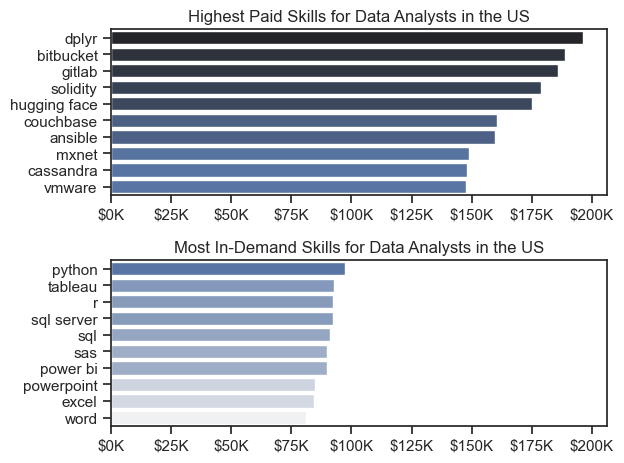

In [86]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')


sns.barplot(data=df_DA_top_pay,x='median',y='job_skills',ax=ax[0],hue='median',palette='dark:b_r',legend=False)
# ax[0].invert_yaxis()

ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))      #f'${x/1000:.1f}K'


sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b',legend=False)
# ax[0].invert_yaxis()

ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))      #f'${x/1000:.1f}K'

plt.tight_layout()
plt.show()